In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms

/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/sw/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/sw/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
os.chdir('/Users/Erin/git/moo_and_mcmc/dream/examples/mixturemodel/')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = np.load('mixmod_mtdreamzs_3chain_'+str(trace)+'1_sampled_params_chain_0.npy')
    traces[trace] = [traces[trace]]
    for chain in range(1, 3):
        traces[trace].append(np.load('mixmod_mtdreamzs_3chain_'+str(trace)+'1_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = np.load('mixmod_mtdreamzs_3chain_'+str(trace)+'1_logps_chain_0.npy')
    logps[trace] = [logps[trace]]
    for chain in range(1, 3):
        logps[trace].append(np.load('mixmod_mtdreamzs_3chain_'+str(trace)+'1_logps_chain_'+str(chain)+'.npy'))

In [5]:
traces['a'][0].shape

(50000, 10)

In [5]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [str(i) for i in range(10)]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(param_trace_dict_a['param_list']):
        param_trace_dict_a[param] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [str(i) for i in range(10)]

In [6]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  10  of  10  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  10  of  10  parameters.
Percent of parameters with GR below 1.1:  100.0


[10, 100.0, 10, 100.0]

In [7]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  10  of  10  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  10  of  10  parameters.
Percent of parameters with GR below 1.1:  100.0


[10, 100.0, 10, 100.0]

In [8]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  10  of  10  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  10  of  10  parameters.
Percent of parameters with GR below 1.1:  100.0


[10, 100.0, 10, 100.0]

In [9]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  10  of  10  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  10  of  10  parameters.
Percent of parameters with GR below 1.1:  100.0


[10, 100.0, 10, 100.0]

In [10]:
param_trace_dicts['a'][param_trace_dicts['a']['param_list'][0]][0]

array([ 0.91491496,  0.91491496,  0.91491496, ..., -4.22853527,
       -4.22853527, -4.22853527])

50000
10
1


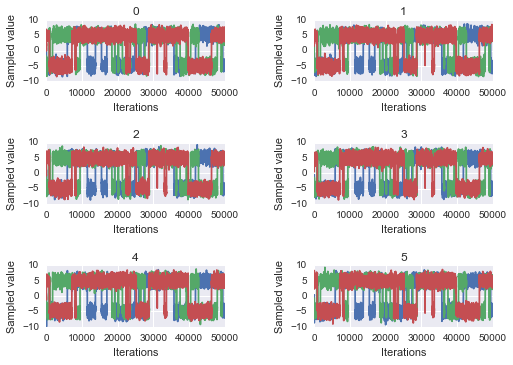

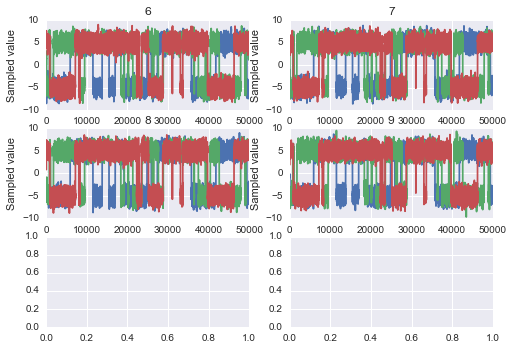

In [11]:
sample_plots(param_trace_dicts['a'])

50000
10
1


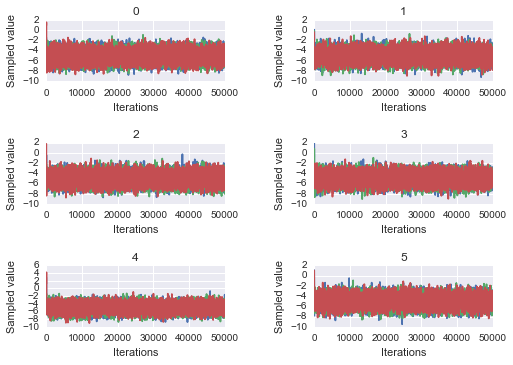

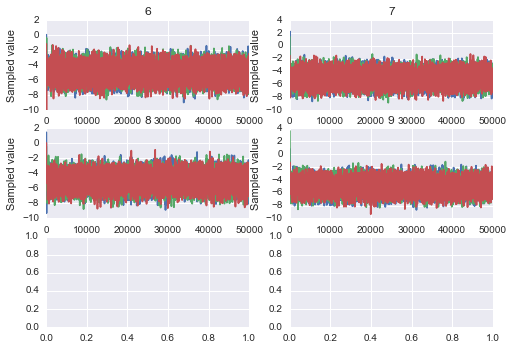

In [12]:
sample_plots(param_trace_dicts['b'])

50000
10
1


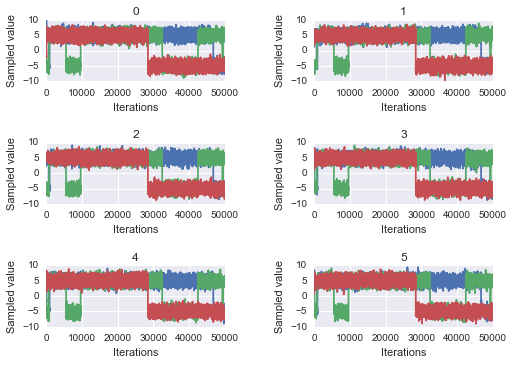

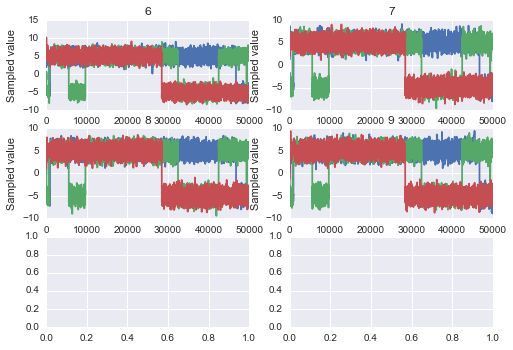

In [13]:
sample_plots(param_trace_dicts['c'])

50000
10
1


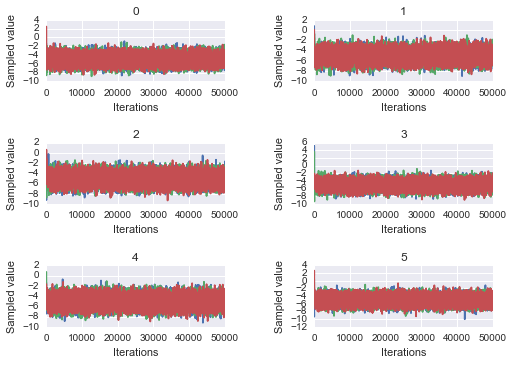

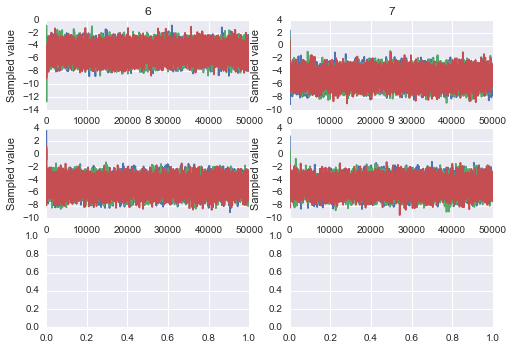

In [14]:
sample_plots(param_trace_dicts['d'])

In [15]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=25000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=25000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=25000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=25000, thin=1)

In [17]:
d = 10
C = np.eye(d)
mu1 = np.array([-5]*d)
mu2 = np.array([5]*d)
samples1 = np.random.multivariate_normal(mu1, C, 33333)
samples2 = np.random.multivariate_normal(mu2, C, 66666)
samples = np.vstack((samples1, samples2))

In [18]:
samples.shape

(99999, 10)

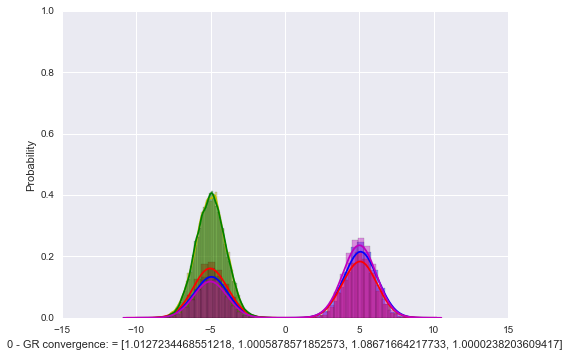

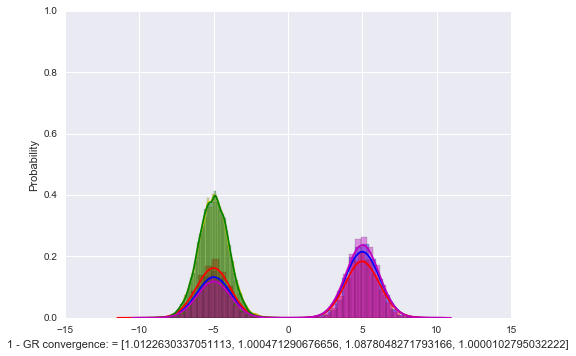

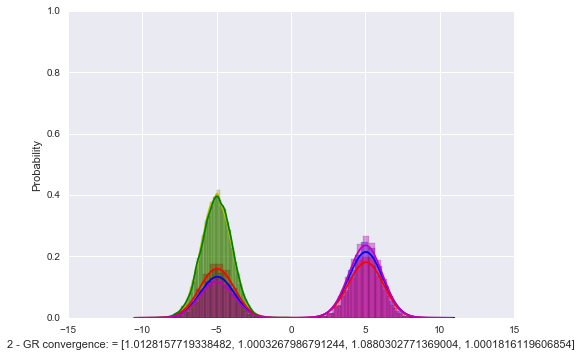

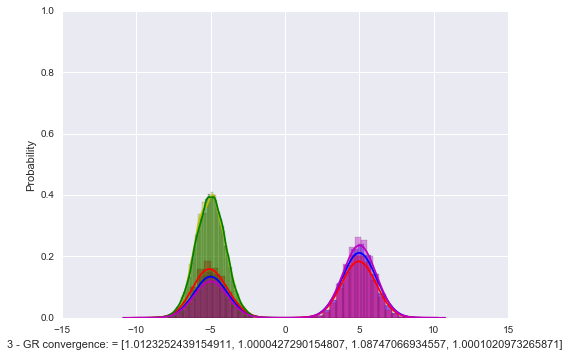

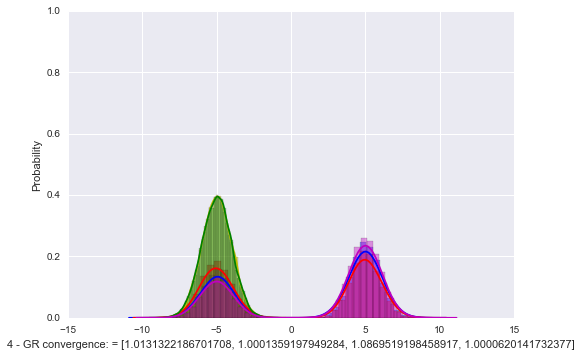

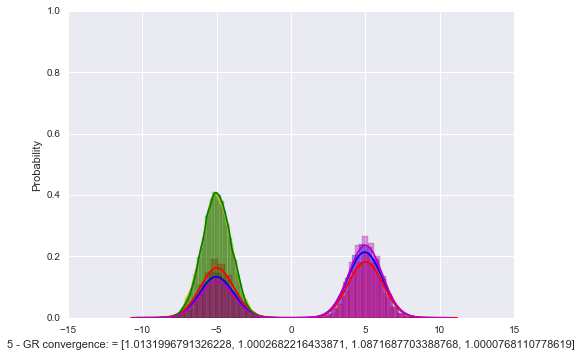

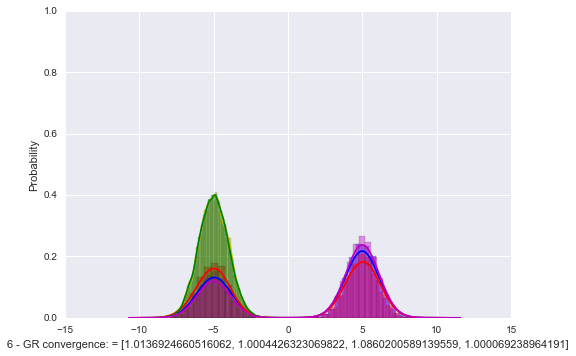

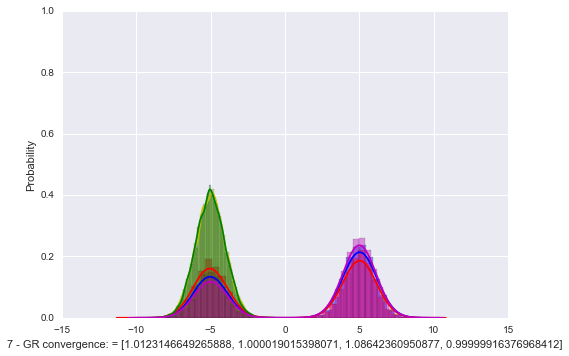

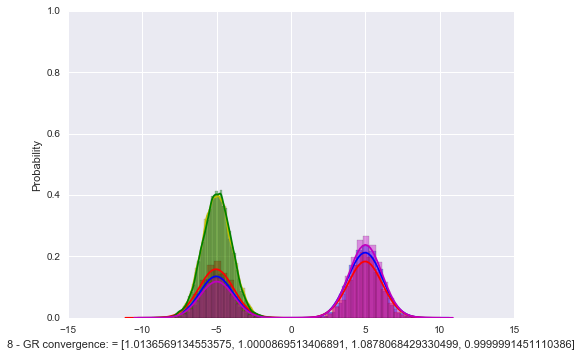

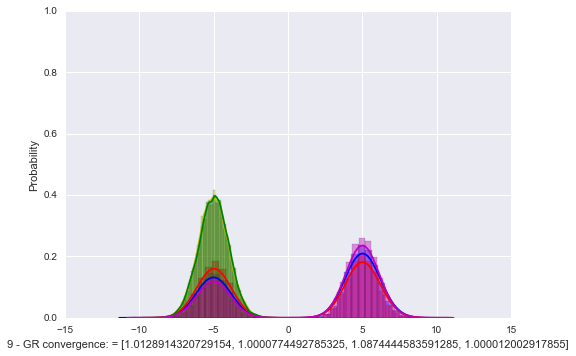

In [19]:
for dim, param_name in enumerate(param_trace_dicts['a']['param_list']):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    sns.distplot(trace_arr_c[:,dim], hist=True, color='r')
    sns.distplot(trace_arr_d[:,dim], hist=True, color='g')
    sns.distplot(samples[:,dim], hist=True, color='m')
    ax.set_ylim(0, 1.0)
    convg_summary = [gelman_rubin_dicts[trace][param_name] for trace in ['a', 'b', 'c', 'd']]
    sns.axlabel(param_name+' - GR convergence: = '+str(convg_summary), 'Probability')

In [20]:
import scipy.io as sio

In [23]:
matlab_params = {}
matlab_ars = {}
matlab_ars = {}
for i, run in zip(range(1, 5), ['a', 'b', 'c', 'd']):
    output = sio.loadmat('output_AR_'+str(i)+'.mat')
    matlab_params[run] = output['ParSet']
    matlab_ars[run] = output['output']['AR']

In [28]:
matlab_params['a'][75000:,:].shape

(75000, 12)

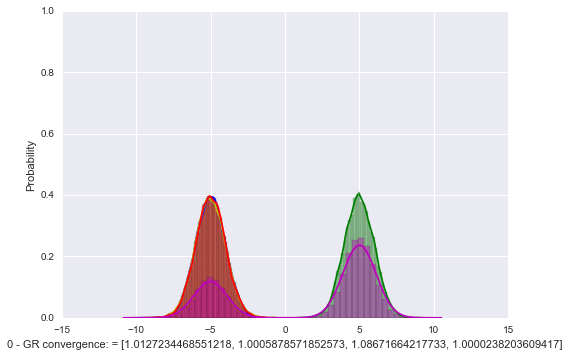

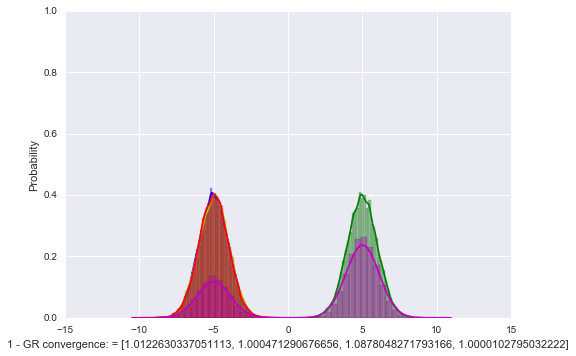

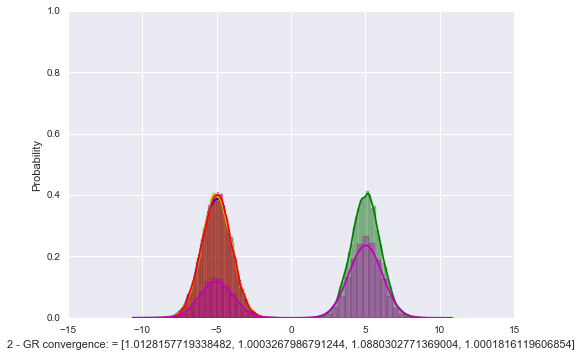

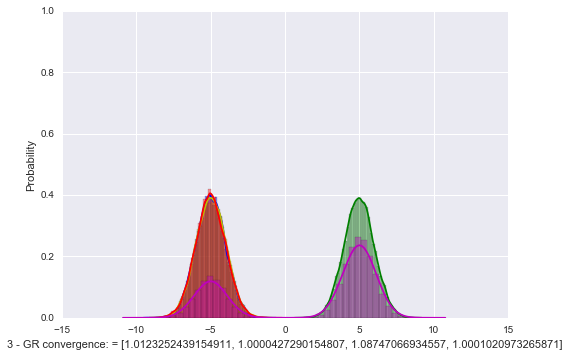

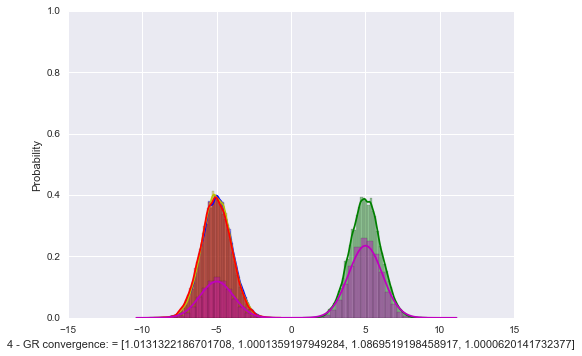

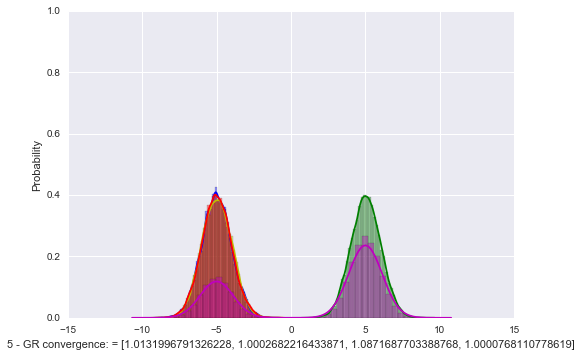

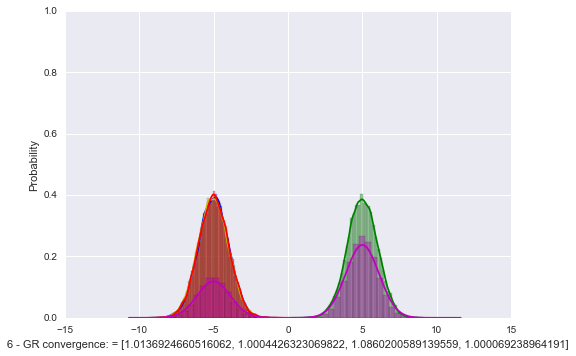

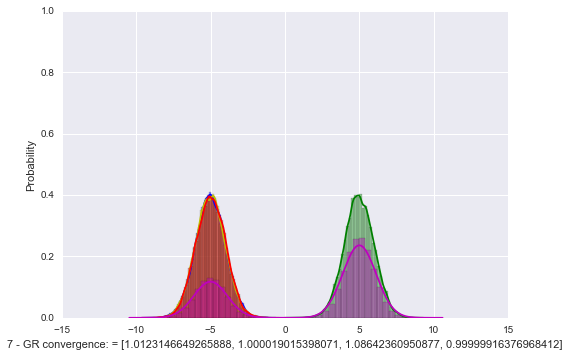

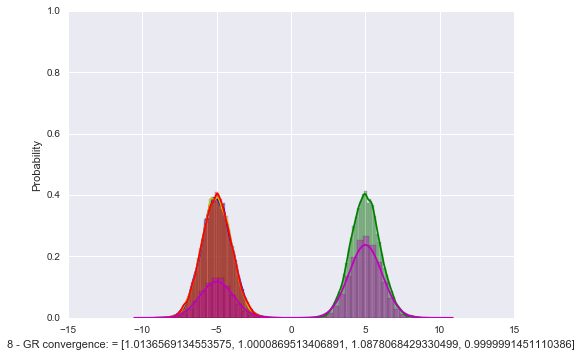

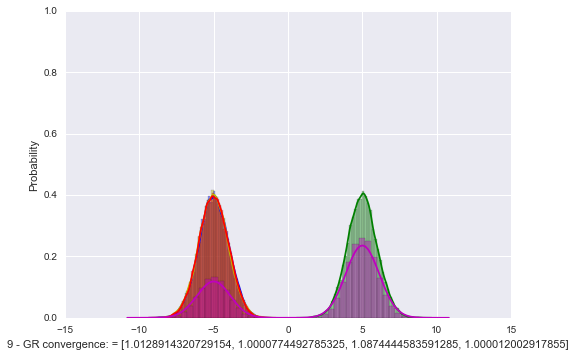

In [29]:
for dim, param_name in enumerate(param_trace_dicts['a']['param_list']):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(matlab_params['a'][75000:,dim], hist=True, color='b')
    sns.distplot(matlab_params['b'][75000:,dim], hist=True, color='y')
    sns.distplot(matlab_params['c'][75000:,dim], hist=True, color='r')
    sns.distplot(matlab_params['d'][75000:,dim], hist=True, color='g')
    sns.distplot(samples[:,dim], hist=True, color='m')
    ax.set_ylim(0, 1.0)
    convg_summary = [gelman_rubin_dicts[trace][param_name] for trace in ['a', 'b', 'c', 'd']]
    sns.axlabel(param_name+' - GR convergence: = '+str(convg_summary), 'Probability')

In [30]:
acceptance_rates = {}
vector_acceptance_rate = {}
running_acceptance_rates = {}
running_acceptance_rates_100window = {}
n_vector_acceptances = {}
n_100windowvec_acceptances = {}
running_acceptance_rates_vec = {}
running_acceptances_rates_vec_100window = {}
n_100window_acceptances = {}
n_acceptances = {}
for run in ['a', 'b', 'c', 'd']:
    acceptance_rates[run] = {}
    vector_acceptance_rate[run] = {}
    running_acceptance_rates[run] = {}
    running_acceptance_rates_100window[run] = {}
    n_vector_acceptances[run] = {}
    n_100windowvec_acceptances[run] = {}
    running_acceptance_rates_vec[run] = {}
    running_acceptances_rates_vec_100window[run] = {}
    n_100window_acceptances[run] = {}
    n_acceptances[run] = {}
    for chain in range(len(traces[run])):
        acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0],)))
        vector_acceptance_rate[run][chain] = 0
        running_acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0]), len(traces['a'][0])))
        running_acceptance_rates_100window[run][chain] = np.zeros((len(traces['a'][0][0]), 500))
        n_vector_acceptances[run][chain] = 0
        n_100windowvec_acceptances[run][chain] = 0
        running_acceptance_rates_vec[run][chain] = np.zeros((1, len(traces['a'][0])))
        running_acceptances_rates_vec_100window[run][chain] = np.zeros((1, 500))
        n_100window_acceptances[run][chain] = {}
        n_acceptances[run][chain] = {}
        for dim in range(len(traces[run][chain][0])):
            n_100window_acceptances[run][chain][dim] = 0
            n_acceptances[run][chain][dim] = 0
            for iteration in range(1, len(traces[run][chain])):
                if dim == 0:
                    comparison = traces[run][chain][iteration] == traces[run][chain][iteration-1]
                    if not np.all(comparison):
                        n_vector_acceptances[run][chain] += 1
                        n_100windowvec_acceptances[run][chain] += 1
                    running_acceptance_rates_vec[run][chain][0, iteration] = float(n_vector_acceptances[run][chain])/iteration
                    
                    if iteration % 100 == 0:
                        running_acceptances_rates_vec_100window[run][chain][0, iteration/100] = float(n_100windowvec_acceptances[run][chain])/100
                        n_100windowvec_acceptances[run][chain] = 0
                if traces[run][chain][iteration][dim] != traces[run][chain][iteration-1][dim]:
                    n_acceptances[run][chain][dim] += 1
                    n_100window_acceptances[run][chain][dim] += 1
                running_acceptance_rates[run][chain][dim, iteration] = float(n_acceptances[run][chain][dim])/iteration
        
                if iteration % 100 == 0:
                    running_acceptance_rates_100window[run][chain][dim, iteration/100] = float(n_100window_acceptances[run][chain][dim])/100
                    n_100window_acceptances[run][chain][dim] = 0
            
            acceptance_rates[run][chain][dim] = float(n_acceptances[run][chain][dim])/len(traces[run][chain])

In [44]:
running_acceptance_rates_vec['a'][0][0,10:]

array([ 0.        ,  0.        ,  0.08333333, ...,  0.3782627 ,
        0.37827513,  0.37828757])

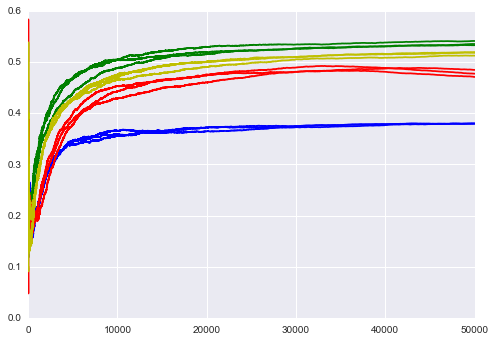

In [31]:
for run in ['a', 'b', 'c', 'd']:
        for chain in range(len(traces[run])):
            if run == 'a':
                plt.plot(range(10, 50000), running_acceptance_rates_vec[run][chain][0,10:], 'b')
            elif run == 'b':
                plt.plot(range(10, 50000), running_acceptance_rates_vec[run][chain][0,10:], 'g')
            elif run == 'c':
                plt.plot(range(10, 50000), running_acceptance_rates_vec[run][chain][0,10:], 'r')
            elif run == 'd':
                plt.plot(range(10, 50000), running_acceptance_rates_vec[run][chain][0,10:], 'y')

In [32]:
for iteration in np.arange(0, 50000, step=1000):
    ar = [[running_acceptance_rates_vec[run][chain][0,iteration] for chain in range(3)] for run in ['a', 'b', 'c', 'd']]
    mean = [np.mean(ar[i]) for i in range(len(ar))]
    print 'At iteration : ',iteration*3,' average acceptance rate: ',mean

At iteration :  0  average acceptance rate:  [0.0, 0.0, 0.0, 0.0]
At iteration :  3000  average acceptance rate:  [0.21433333333333335, 0.307, 0.19933333333333336, 0.26966666666666667]
At iteration :  6000  average acceptance rate:  [0.27583333333333337, 0.38166666666666665, 0.27366666666666667, 0.34849999999999998]
At iteration :  9000  average acceptance rate:  [0.30988888888888888, 0.41922222222222222, 0.32600000000000001, 0.38777777777777778]
At iteration :  12000  average acceptance rate:  [0.33108333333333334, 0.44408333333333339, 0.36499999999999999, 0.41274999999999995]
At iteration :  15000  average acceptance rate:  [0.34299999999999997, 0.45866666666666672, 0.38806666666666662, 0.42733333333333334]
At iteration :  18000  average acceptance rate:  [0.3472777777777778, 0.47072222222222226, 0.40738888888888897, 0.43888888888888888]
At iteration :  21000  average acceptance rate:  [0.35009523809523807, 0.48238095238095235, 0.41942857142857143, 0.44995238095238094]
At iteration :

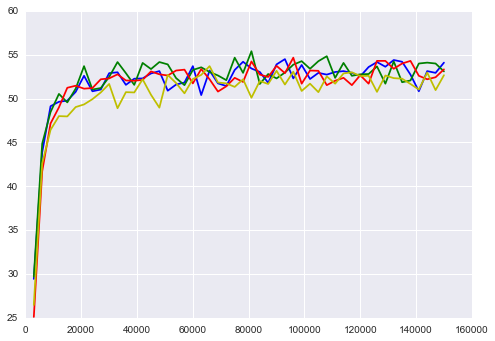

In [33]:
npoints = len(matlab_ars['a'][0][0][1:])
for run in ['a', 'b', 'c', 'd']:
    if run == 'a':
        plt.plot(matlab_ars[run][0][0][1:][:,0], matlab_ars[run][0][0][1:][:,1], 'b')
    elif run == 'b':
        plt.plot(matlab_ars[run][0][0][1:][:,0], matlab_ars[run][0][0][1:][:,1], 'g')
    elif run == 'c':
        plt.plot(matlab_ars[run][0][0][1:][:,0], matlab_ars[run][0][0][1:][:,1], 'r')
    elif run == 'd':
        plt.plot(matlab_ars[run][0][0][1:][:,0], matlab_ars[run][0][0][1:][:,1], 'y')